# Project Developement


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv("saved_model/datasets/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### **1.Handle missing values

In [42]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [44]:
#remove duplicates value


In [45]:
data.drop_duplicates(inplace=True)

In [46]:
#remove unwanted columns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
data.select_dtypes(include=['object']).columns

Index(['Geography', 'Gender'], dtype='object')

In [48]:
categorical_cols = data.select_dtypes(include=['object']).columns
numeric_cols = data.select_dtypes(include=['number']).columns

print("Categorical Columns:", categorical_cols)
print("Numeric Columns:", numeric_cols)

Categorical Columns: Index(['Geography', 'Gender'], dtype='object')
Numeric Columns: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [49]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 5.Finding unique values 

In [50]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [51]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [52]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

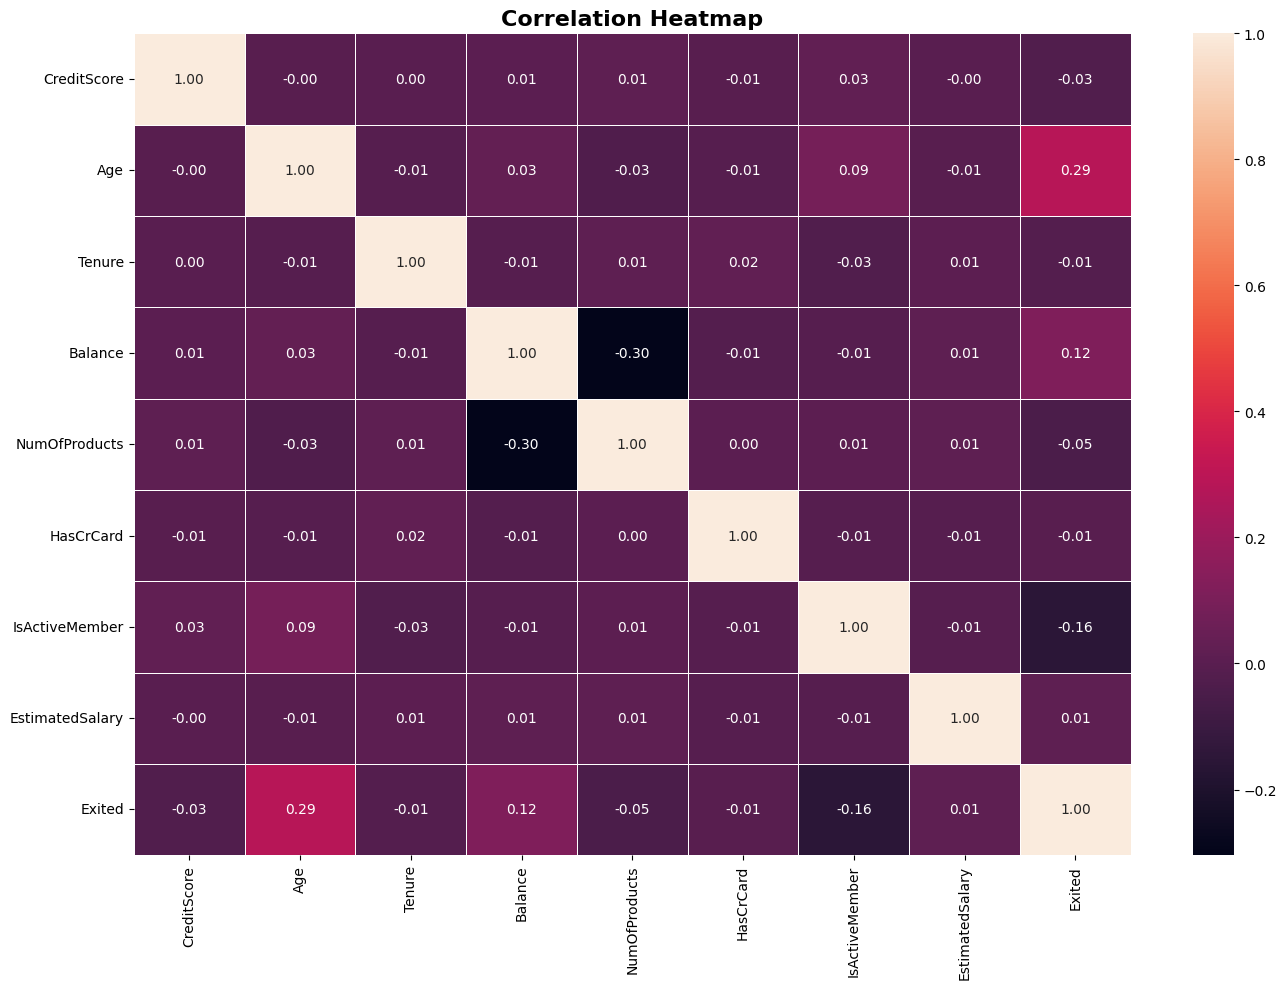

In [53]:
#Correlation ==>heatmap
plt.figure(figsize=(14, 10))
corr_matrix = data[numeric_cols].corr()

#dwaw heatmap to visualize correlations
sns.heatmap(
    corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.tight_layout()#adjust spacing not to overlap

plt.show()#display the heatmap

In [54]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [55]:
# seperating dependent and independent features
X = data.drop('Exited', axis=1) #exited chhod ke sabhi
y = data['Exited']#sirf exited

In [56]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [57]:
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

print("Categorical Columns:", categorical_cols)
print("Numeric Columns:", numeric_cols)

Categorical Columns: Index(['Geography', 'Gender'], dtype='object')
Numeric Columns: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


### 7. Features Pipelines

In [58]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
#import necessary libraries for preprocessing and model building
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [59]:
gender_cat = ['Female', 'Male']
geo_cat = ['France', 'Spain', 'Germany']

In [60]:
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline(steps=[   #define for categorical pipeline
    ('ordinalencoder', OrdinalEncoder(categories=[geo_cat, gender_cat]))])
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numeric_cols),   #Apply numerical pipeline
    ('cat', cat_pipeline, categorical_cols)]   #Apply categorical pipeline
)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )


In [63]:
X_trains =  pd.DataFrame(preprocessor.fit_transform(X_train), columns=numeric_cols.tolist() + categorical_cols.tolist())
X_tests = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [64]:
import  pickle
with open('saved_model/preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

### **ANN IMPLEMENTATION**

In [65]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [66]:
X_train.shape[1],

(10,)

In [67]:
model = Sequential([
    Dense(64, activation='relu', input_shape = (X_trains.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
import tensorflow 
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)


In [70]:
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics = ["accuracy"]
              )

In [71]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [72]:
#Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience = 5, 
    restore_best_weights=True
)

In [73]:
history = model.fit(
    X_trains, y_train,
    validation_split=0.2,
    epochs=100,
    callbacks=[early_stopping, tensorboard_callback]
)

Epoch 1/100
200/200 [==============================] - 2s 6ms/step - loss: 0.4534 - accuracy: 0.8062 - val_loss: 0.3919 - val_accuracy: 0.8444
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3771 - accuracy: 0.8494 - val_loss: 0.3642 - val_accuracy: 0.8475
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3551 - accuracy: 0.8559 - val_loss: 0.3538 - val_accuracy: 0.8556
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3449 - accuracy: 0.8558 - val_loss: 0.3544 - val_accuracy: 0.8500
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3417 - accuracy: 0.8587 - val_loss: 0.3510 - val_accuracy: 0.8481
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3383 - accuracy: 0.8598 - val_loss: 0.3487 - val_accuracy: 0.8562
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3356 - accuracy: 0.8616 - val_loss: 0.3507 - val_accuracy: 0.8544

In [74]:
model.save("model.h5")

c:\Users\khush\anaconda3\envs\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [75]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy'] 

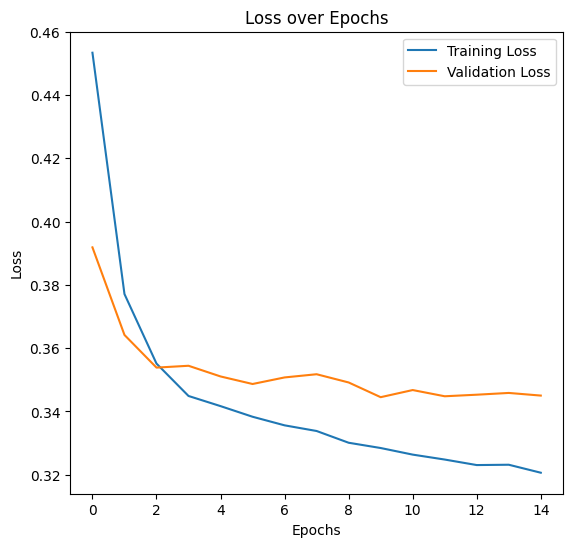

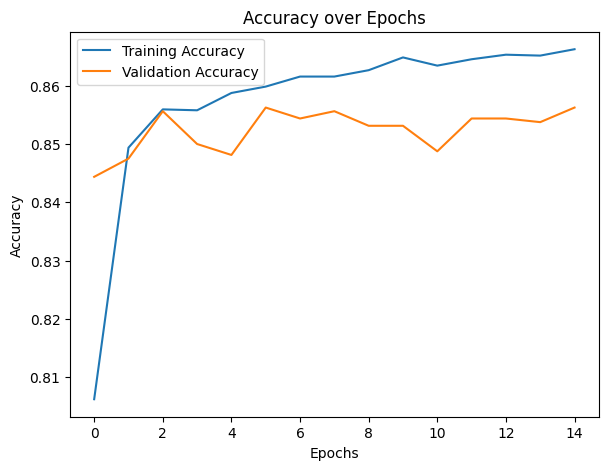

In [76]:
epochs = len(acc)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [77]:
##LOAD TRANSFER
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [78]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 24284), started 20:12:21 ago. (Use '!kill 24284' to kill it.)